# Tree Data

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn') #set plot style so stuff looks nice

### Importing the data

In [3]:
treeData = pd.read_csv("https://data.wprdc.org/datastore/dump/1515a93c-73e3-4425-9b35-1cd11b2196da")

/opt/tljh/user/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
treeData.head()

,id,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,growth_space_type,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,754166088,7428,MONTICELLO ST,Stump,Stump,0.0,0.0,10.0,2.0,Well or Pit,...,Homewood North,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-17,40.458169,-79.889724
1,1946899269,220,BALVER AVE,Linden: Littleleaf,Tilia cordata,0.0,0.0,99.0,99.0,Open or Unrestricted,...,Oakwood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-19,40.429269,-80.067868
2,1431517397,2822,SIDNEY ST,Maple: Red,Acer rubrum,22.0,6.0,6.0,3.0,Well or Pit,...,South Side Flats,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,40.426797,-79.965035
3,994063598,608,SUISMON ST,Maple: Freeman,Acer x freemanii,25.0,10.0,3.0,3.0,Well or Pit,...,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.455503,-79.999276
4,1591838573,1135,N NEGLEY AVE,Maple: Norway,Acer platanoides,52.0,13.0,99.0,99.0,Open or Unrestricted,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.476667,-79.924106


What does it look like as a bar graph?

In [5]:
#to_frame and reset_index turn it from a list indexed by neigborhood to a dataframe with two columns and numerical index
treeCounts = treeData.groupby("neighborhood")['id'].count().to_frame().reset_index()
treeCounts.columns = ["neighborhood", "count"] #count used to be id, i used it because all of them have one
#treeCounts.plot(kind="bar", x="neighborhood")
treeCounts.head()

,neighborhood,count
0,Allegheny Center,867
1,Allegheny West,386
2,Allentown,84
3,Arlington,107
4,Arlington Heights,5


*ewwww*... I guess i need a map

In [6]:
import geopandas

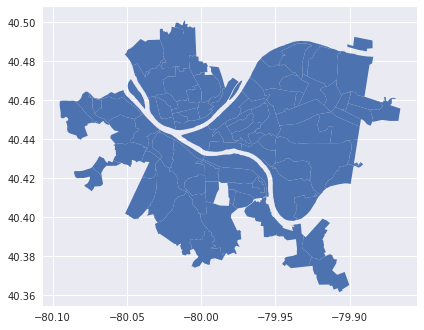

In [7]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.plot()

Shapefile! go!

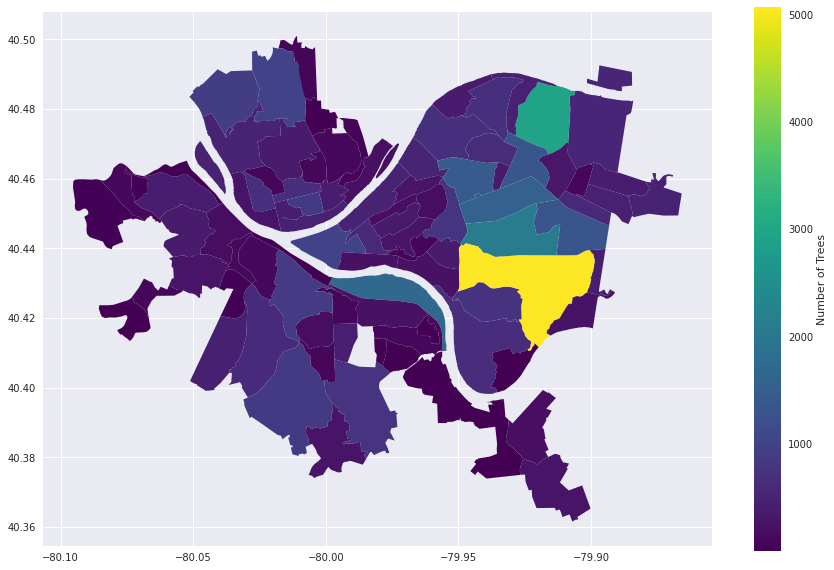

In [8]:
treeMap = neighborhoods.merge(treeCounts, how='left', left_on='hood', right_on='neighborhood')
treeMap.plot(column="count",
             cmap="viridis",
             legend=True, 
             figsize=(15,10),
             legend_kwds={'label': "Number of Trees"})

Much better!

## Mapping to 0-1

In [21]:
maxTrees = treeCounts.max()['count']
minTrees = treeCounts.min()['count']
treeScores = treeCounts['count'].map(lambda x : ((x - minTrees) / (maxTrees - minTrees)))
treeCounts['score'] = treeScores 
treeCounts.head()

,neighborhood,count,score
0,Allegheny Center,867,0.170741
1,Allegheny West,386,0.075907
2,Allentown,84,0.016364
3,Arlington,107,0.020899
4,Arlington Heights,5,0.000789


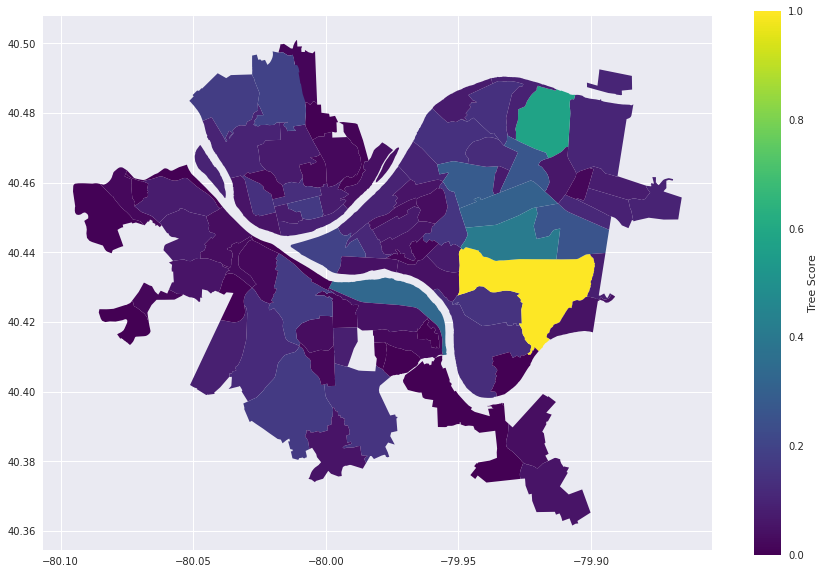

In [23]:
treeMap2 = neighborhoods.merge(treeCounts, how='left', left_on='hood', right_on='neighborhood')
treeMap2.plot(column="score",
             cmap="viridis",
             legend=True, 
             figsize=(15,10),
             legend_kwds={'label': "Tree Score"})

And it looks the same, perfect!